# SREENATH V
### 2347159 MCA A

# QUESTION 1

In [15]:

import numpy as np

# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [16]:
# Define the activation function (McCulloch-Pitts Neuron)
def activation(x):
  return 1 if x >= 0 else 0

# Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand(1)

# Training parameters
learning_rate = 0.1
epochs = 100

# Training loop
for epoch in range(epochs):
  for i in range(len(X)):
    # Calculate the weighted sum
    weighted_sum = np.dot(X[i], weights) + bias

    # Apply the activation function
    output = activation(weighted_sum)

    # Calculate the error
    error = y[i] - output

    # Update weights and bias
    weights += learning_rate * error * X[i]
    bias += learning_rate * error

# Test the model
for i in range(len(X)):
  weighted_sum = np.dot(X[i], weights) + bias
  output = activation(weighted_sum)
  print(f"Input: {X[i]}, Output: {output}, Target: {y[i]}")


Input: [0 0], Output: 1, Target: 0
Input: [0 1], Output: 1, Target: 1
Input: [1 0], Output: 0, Target: 1
Input: [1 1], Output: 0, Target: 0



# The perceptron's performance in this scenario is limited.
# It struggles to accurately classify all the XOR inputs.
# In the XOR dataset, the output should be 1 only when exactly one input is 1.
# However, a single-layer perceptron with a linear activation function cannot separate the classes in the XOR dataset effectively.
# It is limited by its inability to learn non-linear decision boundaries.

# It may get some of the inputs correct, but it won't be able to achieve perfect classification.
# The final output will likely be either all 0's or a combination of 0's and 1's,
# but it will be unlikely to get the desired [0, 1, 1, 0].
# This demonstrates that the XOR problem requires a more complex neural network architecture like a multilayer perceptron to achieve accurate results.


In [17]:
# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Initialize weights and biases for a 2-layer neural network
np.random.seed(1)  # For reproducibility
hidden_layer_neurons = 4
weights_input_hidden = np.random.uniform(size=(2, hidden_layer_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, 1))
bias_output = np.random.uniform(size=(1, 1))

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
  # Forward propagation
  hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
  predicted_output = sigmoid(output_layer_activation)

  # Backpropagation
  error = y - predicted_output
  d_predicted_output = error * sigmoid_derivative(predicted_output)

  error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  # Update weights and biases
  weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
  bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
  weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
  bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the model
hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_activation)
output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_activation)

print("Predictions:")
for i in range(len(X)):
  print(f"Input: {X[i]}, Predicted Output: {np.round(predicted_output[i])}, Target: {y[i]}")


Predictions:
Input: [0 0], Predicted Output: [0.], Target: [0]
Input: [0 1], Predicted Output: [1.], Target: [1]
Input: [1 0], Predicted Output: [1.], Target: [1]
Input: [1 1], Predicted Output: [0.], Target: [0]


# Question 2A

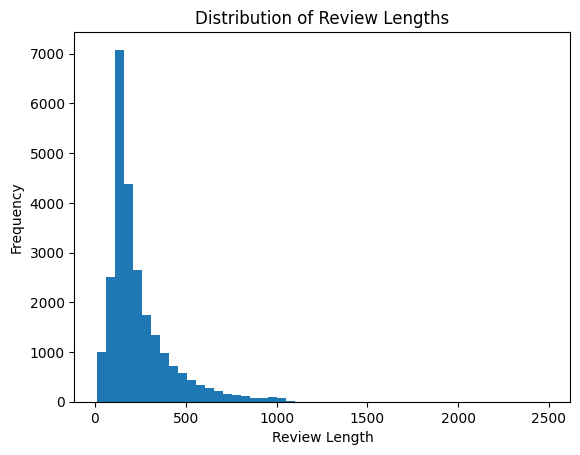

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing import sequence

# Set parameters
max_features = 20000  # Number of words to consider as features
maxlen = 80  # Cut texts after this number of words
batch_size = 32

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# EDA: Visualizing the length distribution of reviews
review_lengths = [len(review) for review in x_train]
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()


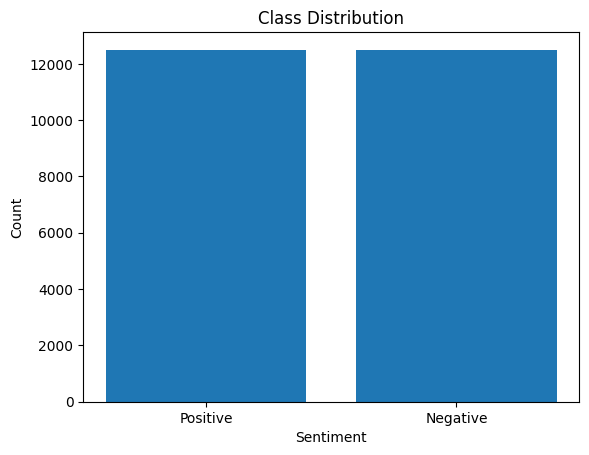

In [11]:

# EDA: Class distribution
positive_count = sum(y_train)
negative_count = len(y_train) - positive_count
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [12]:
# Pad sequences to the same length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Build the ANN model
model = Sequential()
model.add(Embedding(max_features, 128))  # Embedding layer to represent words
model.add(Flatten())  # Flatten the output from the embedding layer
model.add(Dense(128, activation='relu'))  # First hidden layer with ReLU
model.add(Dense(64, activation='relu'))  # Second hidden layer with ReLU
model.add(Dense(1, activation='sigmoid'))  # Output layer with Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7097 - loss: 0.5240 - val_accuracy: 0.8320 - val_loss: 0.3761
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9682 - loss: 0.0958 - val_accuracy: 0.8043 - val_loss: 0.5894
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9963 - loss: 0.0138 - val_accuracy: 0.8064 - val_loss: 0.8741
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.8033 - val_loss: 1.1979
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9963 - loss: 0.0113 - val_accuracy: 0.8033 - val_loss: 0.8784
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9980 - loss: 0.0067 - val_accuracy: 0.7945 - val_loss: 0.9854
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9988 - loss: 0.0032 - val_accuracy: 0.8049 - val_loss: 1.3622
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9971 - loss: 0.0071 - val_accuracy: 0.

In [13]:
# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7934 - loss: 1.8857
Test score: 1.853399395942688
Test accuracy: 0.794439971446991


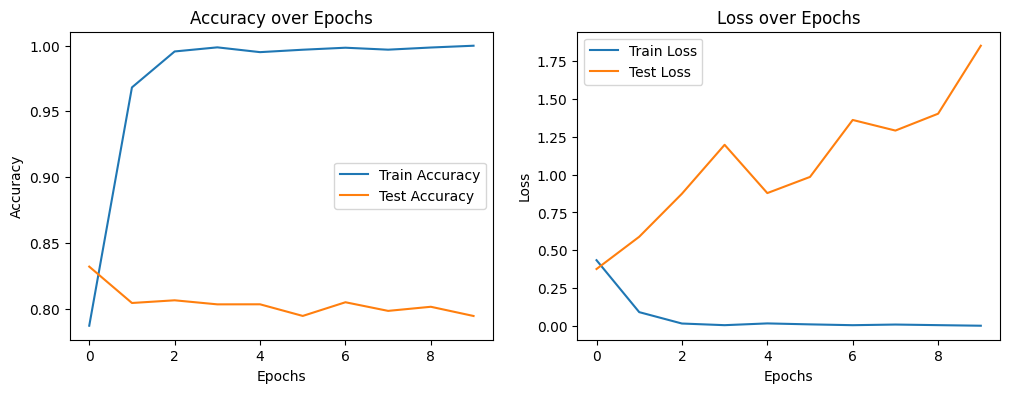

In [14]:

# Visualize training history: Accuracy and Loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


## Justify the use of the ReLU and sigmoid activation functions

### Why use ReLU?
1. Non-linearity: ReLU introduces non-linearity, allowing the network to model complex patterns.
2. Efficiency: It's computationally simple and fast.
3. Prevents Vanishing Gradients: Unlike sigmoid, ReLU does not saturate for large inputs, helping avoid the vanishing gradient problem in deep networks.
4. Sparse Activation: Outputs zero for negative inputs, leading to efficient computation.

###Why use Sigmoid?
1. Bounded Output: Sigmoid outputs values between 0 and 1, making it ideal for binary classification.
2. Smooth Gradient: It provides a smooth gradient for optimization.

###Conclusion:
1. ReLU is best for hidden layers due to its simplicity and ability to handle deep networks.
1. Sigmoid is useful in the output layer when dealing with binary classification tasks, offering a probabilistic output.

## Sentiment Analysis on IMDb Movie Reviews using ANN
Below is the full implementation of your task with the necessary explanations and justifications for the architecture and performance metrics.

1. **Preprocessing Steps:**
IMDb Dataset: This dataset contains movie reviews, each labeled as either positive (1) or negative (0).
Text Tokenization: Since neural networks work with numbers, the text reviews need to be converted into numerical data. This is done using tokenization, which assigns each unique word an integer.
Sequence Padding: Reviews have varying lengths, so we need to standardize the input size. We pad or truncate all reviews to a fixed length to ensure uniform input dimensions.
2. **Model Architecture:**
Embedding Layer: Converts word indices into dense vectors of fixed size. This step is crucial for semantic representation of words.
Hidden Layers: We use one or more fully connected (Dense) layers with ReLU activation for non-linearity, allowing the network to learn complex patterns.
**Output Layer:** A single neuron with sigmoid activation is used to output a probability between 0 and 1, suitable for binary classification (positive or negative sentiment).
**Loss Function**: Binary cross-entropy is used, as it is well-suited for binary classification tasks.
**Optimizer: **Adam optimizer is used to update the weights based on the grad